In [7]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Upload the CSV file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data from the uploaded CSV file
whisky_data = pd.read_csv(file_name)

# Display the first few rows and column names of the dataset
print("Column Names:", whisky_data.columns)
whisky_data.head()


Saving whisky.csv to whisky (2).csv
Column Names: Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')


,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [9]:
# Create a graph using networkx
G = nx.Graph()

# Add nodes with whiskey names
G.add_nodes_from(whisky_data['Distillery'])


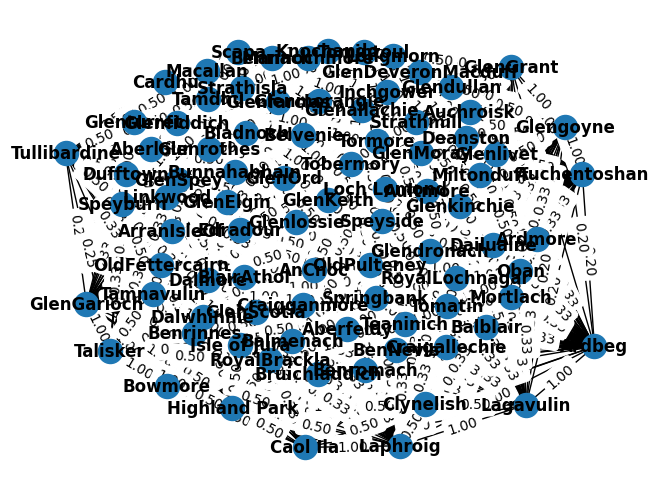

In [10]:
# Calculate Euclidean distance between two data points
def euclidean_distance(point1, point2):
    return ((point1 - point2) ** 2).sum() ** 0.5

# Define the taste features for comparison
taste_features = ['Sweetness', 'Body', 'Smoky']

# Add edges based on taste similarity using Euclidean distance
for feature in taste_features:
    for i in range(len(whisky_data)):
        for j in range(i + 1, len(whisky_data)):
            distance = euclidean_distance(
                whisky_data[feature].iloc[i],
                whisky_data[feature].iloc[j]
            )
            similarity = 1 / (1 + distance)  # Adjusting to create similarity (higher values mean more similar)

            G.add_edge(whisky_data['Distillery'].iloc[i], whisky_data['Distillery'].iloc[j], weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges}
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
